# Training

In [99]:
import tensorflow as tf
import tensorflow.keras as keras
from nsp.model import create_model, only_recurrent_model

In [120]:
EMB_SIZE=2
model = only_recurrent_model(WINDOW, EMB_SIZE, learning_rate=0.0005)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=500, min_lr=0.0000001, verbose=0)
#checkpointer = ModelCheckpoint(filepath="test_normalizzato.hdf5", verbose=2, save_best_only=True)
import datetime
log_folder = "./log/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tbCallBack = keras.callbacks.TensorBoard(log_dir=log_folder, update_freq='epoch')
history = model.fit(X_train, Y_train, 
              epochs = 1000, 
              batch_size = 512, 
              verbose=2, 
              validation_data=(X_test, Y_test),
              callbacks=[tbCallBack], #checkpointer, reduce_lr
              shuffle=True)

Epoch 1/1000
7/7 - 1s - loss: 0.4080 - val_loss: 0.3838
Epoch 2/1000
7/7 - 0s - loss: 0.3254 - val_loss: 0.2743
Epoch 3/1000
7/7 - 0s - loss: 0.2506 - val_loss: 0.1412
Epoch 4/1000
7/7 - 0s - loss: 0.2053 - val_loss: 0.0477
Epoch 5/1000
7/7 - 0s - loss: 0.1864 - val_loss: 0.0385
Epoch 6/1000
7/7 - 0s - loss: 0.1642 - val_loss: 0.0581
Epoch 7/1000
7/7 - 0s - loss: 0.1489 - val_loss: 0.0519
Epoch 8/1000
7/7 - 0s - loss: 0.1380 - val_loss: 0.0417
Epoch 9/1000
7/7 - 0s - loss: 0.1294 - val_loss: 0.0417
Epoch 10/1000
7/7 - 0s - loss: 0.1229 - val_loss: 0.0453
Epoch 11/1000
7/7 - 0s - loss: 0.1151 - val_loss: 0.0414
Epoch 12/1000
7/7 - 0s - loss: 0.1126 - val_loss: 0.0418
Epoch 13/1000
7/7 - 0s - loss: 0.1060 - val_loss: 0.0400
Epoch 14/1000
7/7 - 0s - loss: 0.1030 - val_loss: 0.0379
Epoch 15/1000
7/7 - 0s - loss: 0.1016 - val_loss: 0.0410
Epoch 16/1000
7/7 - 0s - loss: 0.0980 - val_loss: 0.0369
Epoch 17/1000
7/7 - 0s - loss: 0.0954 - val_loss: 0.0405
Epoch 18/1000
7/7 - 0s - loss: 0.0922 - 

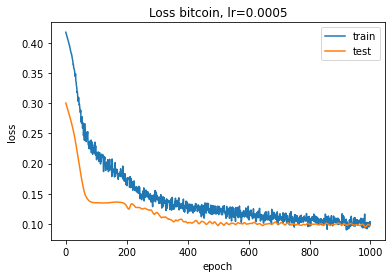

In [107]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss bitcoin, lr=0.0005')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lr_0.0005_reduce-lr_model_big1.jpg')
plt.show()

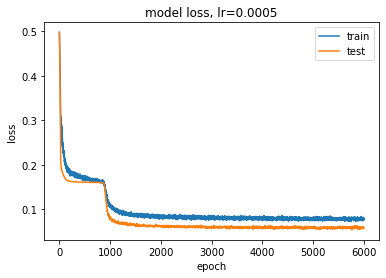

In [231]:
# Save the weight and architecture of the neural network
model.save_weights('weights.h5', overwrite=True)
model.save('model.h5', overwrite=True)

In [ ]:
# Save the network architecture in JSON format
model_json = model.to_json()
json_file = open("test.json", "w")
json_file.write(model_json)
json_file.close()